<div class=" alert alert-block alert-success">
    <h1><b>STOCK Prediction LSTM Model</b></h1>
</div>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [43]:
start_date = '2015-01-01'
end_date = '2023-12-31'
symbol = 'AMZN'

data = yf.download(symbol, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
2015-01-08,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [44]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100
2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700
2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000


In [45]:
# resetting the index
data = data.reset_index()

# removing unecessary columns
data = data.drop(['Date','Adj Close'],axis= 1 )

In [46]:
data.head()

,Open,High,Low,Close,Volume
0,15.6290,15.7375,15.3480,15.4260,55664000
1,15.3505,15.4190,15.0425,15.1095,55484000
2,15.1120,15.1500,14.6190,14.7645,70380000
3,14.8750,15.0640,14.7665,14.9210,52806000
4,15.0160,15.1570,14.8055,15.0230,61768000


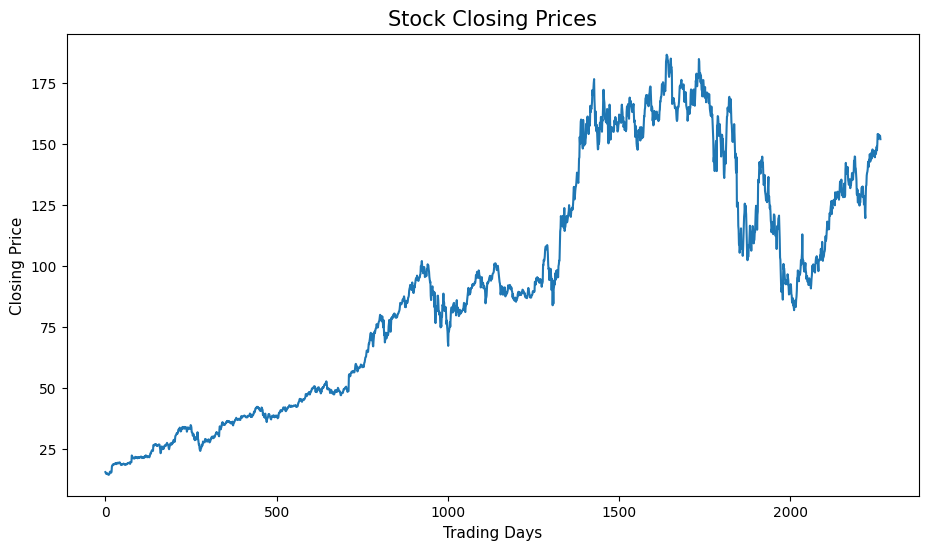

In [47]:
plt.figure(figsize=(11,6))
plt.title('Stock Closing Prices',fontsize = 15)
plt.xlabel('Trading Days',fontsize = 11)
plt.ylabel('Closing Price',fontsize = 11)
plt.plot(data.Close)


### Finding 100 Days Moving Average (MA) 
- Finding mean of previous 100 closing values

In [12]:
moving_avg100 = data.Close.rolling(100).mean()
moving_avg100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    249.8636
3268    249.3967
3269    248.9129
3270    248.5198
3271    248.0950
Name: Close, Length: 3272, dtype: float64

### Plotting Closing Prices *vs* 100MA  

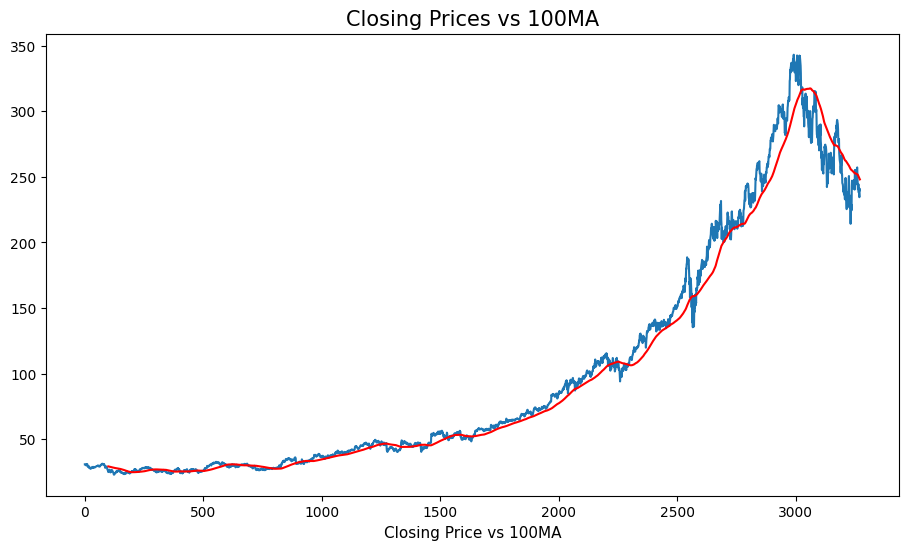

In [13]:
plt.figure(figsize=(11,6))
plt.title('Closing Prices vs 100MA',fontsize = 15)
plt.xlabel('Closing Price vs 100MA',fontsize = 11)
plt.plot(data.Close)
plt.plot(moving_avg100, 'red')


### Plotting 100 and 200 days moving days

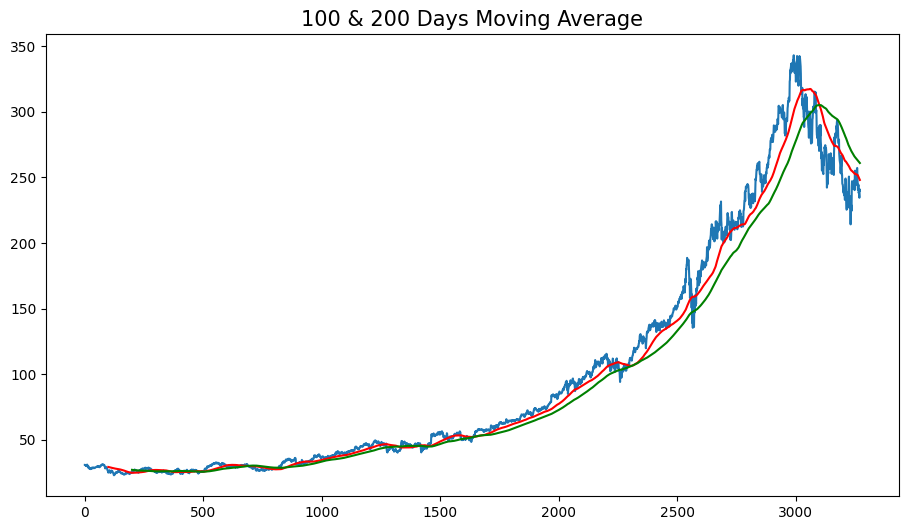

In [14]:
moving_avg200 = data.Close.rolling(200).mean()
plt.figure(figsize=(11,6))
plt.title('100 & 200 Days Moving Average',fontsize=15)
plt.plot(data.Close)
plt.plot(moving_avg100, 'red')
plt.plot(moving_avg200, 'green')

In [15]:
data.shape

(3272, 5)

In [16]:
# Splitting the dataset into training and testing data

data_training = pd.DataFrame(data['Close'][0: int(len(data) * 0.7)])
data_testing  = pd.DataFrame(data['Close'][int(len(data)*0.7) : int(len(data))])

data_training.head()

,Close
0,30.950001
1,30.959999
2,30.770000
3,30.450001
4,30.660000


In [17]:
data_testing.head()

,Close
2290,105.669998
2291,105.250000
2292,106.889999
2293,106.809998
2294,106.900002


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)

In [20]:
data_training_array

array([[0.08574515],
       [0.08585312],
       [0.0838013 ],
       ...,
       [0.90939526],
       [0.89654426],
       [0.88833689]])

In [51]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

## LSTM Model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu' , return_sequences= True, input_shape= (x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1)) # connect all the layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit( x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 23s 272ms/step - loss: 0.0276
Epoch 2/50
69/69 [==============================] - 22s 318ms/step - loss: 0.0053
Epoch 3/50
69/69 [==============================] - 19s 277ms/step - loss: 0.0050
Epoch 4/50
69/69 [==============================] - 19s 273ms/step - loss: 0.0043
Epoch 5/50
69/69 [==============================] - 18s 262ms/step - loss: 0.0046
Epoch 6/50
69/69 [==============================] - 19s 271ms/step - loss: 0.0040
Epoch 7/50
69/69 [==============================] - 19s 274ms/step - loss: 0.0039
Epoch 8/50
69/69 [==============================] - 18s 266ms/step - loss: 0.0040
Epoch 9/50
69/69 [==============================] - 22s 314ms/step - loss: 0.0033
Epoch 10/50
69/69 [==============================] - 22s 315ms/step - loss: 0.0033
Epoch 11/50
69/69 [==============================] - 18s 262ms/step - loss: 0.0036
Epoch 12/50
69/69 [==============================] - 21s 310ms/step - loss: 0.0035
Epoch 13/50
6

In [26]:
model.save('keras_stock_prediction_model.keras')

## Testing

In [ ]:
prev_100_days = data_training.tail(100)
prev_100_days

In [28]:
data_testing.head()

,Close
2290,105.669998
2291,105.250000
2292,106.889999
2293,106.809998
2294,106.900002


In [29]:
new_df = pd.concat([prev_100_days,data_testing], ignore_index=True)
new_df.head()

,Close
0,113.370003
1,112.139999
2,113.209999
3,111.699997
4,113.570000


In [30]:
input_data = scaler.fit_transform(new_df)
input_data

array([[0.07727531],
       [0.07233514],
       [0.07663267],
       ...,
       [0.56390075],
       [0.58992692],
       [0.58514747]])

In [31]:
input_data.shape

(1082, 1)

In [52]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [53]:
# converting to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

In [54]:
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [35]:
# making predictions (y-hat)

y_predicted = model.predict(x_test)
y_predicted.shape

31/31 [==============================] - 3s 69ms/step


(982, 1)

In [36]:
# scale up the values
scaler.scale_  # returns the scalability factor

array([0.00401639])

In [37]:
mul_by_fac = 1 / 0.00682769
y_test = y_test * mul_by_fac
y_predicted = y_predicted * mul_by_fac

## Plotting the Original vs Predicted graph

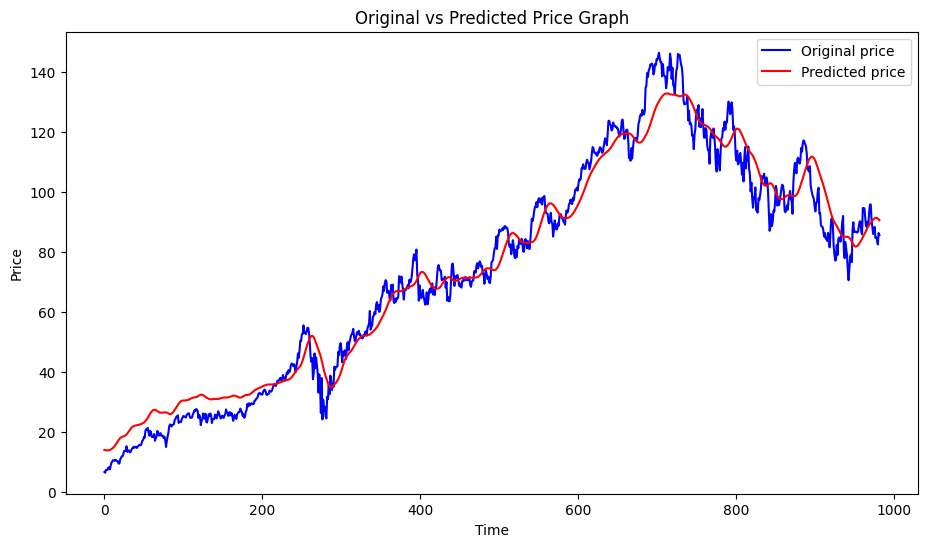

In [38]:
plt.figure(figsize=(11,6))
plt.title('Original vs Predicted Price Graph')
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time' , fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.legend()
plt.show()